<h1 style="font-size: 2rem">Solving Inhomogeneous LTI Differential Equations</h1>




In [1]:
pip install tellurium

     |████████████████████████████████| 122kB 17.1MB/s 
     |████████████████████████████████| 14.9MB 272kB/s 
     |████████████████████████████████| 3.2MB 46.3MB/s 
     |████████████████████████████████| 2.5MB 46.7MB/s 
     |████████████████████████████████| 36.7MB 1.3MB/s 
     |████████████████████████████████| 5.8MB 21.6MB/s 
     |████████████████████████████████| 5.6MB 23.7MB/s 
     |████████████████████████████████| 3.1MB 41.9MB/s 
     |████████████████████████████████| 27.4MB 149kB/s 
     |████████████████████████████████| 6.2MB 25.2MB/s 
     |████████████████████████████████| 16.6MB 226kB/s 
     |████████████████████████████████| 2.0MB 46.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninst

# Preliminaries

In [2]:
import sympy
import numpy as np
from sympy import init_printing
init_printing()
import tellurium as te
import matplotlib.pyplot as plt

## Latex Macros
Macro definitions

* change in species concentrations: \dxdt - how $x$ changes with respect to $t$
$\newcommand{\dxdt}[]{ \frac{d {\bf x}}{d t}}$: $\dxdt$

* change in parameter values: \dpdt - how $p$ changes with respect to $t$
$\newcommand{\dpdt}[]{ \frac{d {\bf p}}{d t}}$: $\dpdt$

* total change in reaction rate: \dv
$\newcommand{\dv}[] {d {\bf v} }$: $\dv$

* total change in state: \dx
$\newcommand{\dx}[] {d {\bf x} }$: $\dx$

* change in reaction rate w.r.t. $\bf{x}$: \dvdx - 
$\newcommand{\dvdx}[]{ \frac{\partial {\bf v}}{\partial {\bf x}}}$ $\dvdx$

* change in reaction rate w.r.t. $\bf{p}$: \dvdp - 
$\newcommand{\dvdp}[]{ \frac{\partial {\bf v}}
{\partial {\bf p}}}$ $\dvdp$

# Helper Functions

In [3]:
def addSymbols(symbolStr):
  """
  Adds the list of symbols in the blank separated string.
  """
  symbols = symbolStr.split(" ")
  globalDct = globals()
  for idx, symbol in enumerate(symbols):
    globalDct[symbol] = sympy.Symbol(symbol)

# Tests
variables = ["aa", "bbb", "fruit"]
symbolStr = " ".join(variables)
addSymbols(symbolStr)
for variable in variables:
  assert(variable in globals())
  delStmt = "del %s" % variable
  exec(delStmt)

In [4]:
def setSymbolValue(symbol, value):
  globalDct = globals()
  globalDct[symbol] = value

In [5]:
def mkVector(name, numRow):
  # Create the solution vector. The resulting vector is in the global name space.
  symbols = ["%s_%d" % (name, n) for n in range(numRow)]
  symbolStr = " ".join(symbols)
  addSymbols(symbolStr)
  setSymbolValue(name, sympy.Matrix([ [s] for s in symbols]))

# Test
numRow = 5
mkVector("q", numRow)
assert(len(q) == 5)
assert("q" in globals().keys())
del q

# General Approach

Find ${\bf x}(t)$ such that
${\bf x}^{\prime}(t) = {\bf A} {\bf x}(t) + {\bf r}(t)$ for ${\bf A}$ a matrix of constants
and ${\bf r}(t)$ a vector of time-varying terms.

Approach
1. ${\bf x}(t) = {\bf x}_c (t) + {\bf x}_p (t)$, where $c$ indicates the complementary solution for the homogeneous system and $p$ indicates a particular solution for the inhomogeneous system.

## Homogeneous Solution (Complementary Equation)

1. The homogeneous equation is ${\bf x}^{\prime} (t) = {\bf A}{\bf x}(t)$.
1. Trial solution for homogeneous system ${\bf x}_c(t) = {\bf v} e^{\lambda t}$, where ${\bf v}$ is a vector of constants.
1. Substituting the trial solution $\lambda {\bf v} e^{\lambda t} = {\bf A}{\bf v} e^{\lambda t} \equiv (A - {\bf I} \lambda){\bf v} = {\bf 0}$. Thus, $\lambda$ is an eigenvalue of ${\bf A}$ and ${\bf v}$ is is eigenvector.
1. So, a solution to the homogeneous equation the homogeneous equation has the form
$\sum_n c_n {\bf v}_n e^{\lambda_n t}$,
where $\lambda_n, {\bf v}_n$ are eigenvalue, eigenvector combinations.
1. We define ${\bf X}_c (t) =
\begin{pmatrix}
{\bf v}_1 e^{\lambda_1 t} & \cdots & {\bf v}_N e^{\lambda_N t}
\end{pmatrix}
$
1. Given ${\bf x}(t_0)$, we can find values for the $c_n$. Consider $t_0 = 0$.
Note that
   \begin{equation*}
    {\bf X}_c (0)
   \begin{pmatrix}
   c_1 \\
   \vdots \\
   c_N
   \end{pmatrix}
   = {\bf x} (0),
   \end{equation*}
   which is a system of linear equations in $c_n$.
   

## Particular Solution

As is standard practice, we solve for the particular solution.
Let $u_n(t)$ be a function associated with the $n$-th variable such that

$
\begin{align*}
{\bf x}_p & = &
{\bf X}_c (t)
\begin{pmatrix}
u_1 (t) \\
\vdots \\
u_N (t)
\end{pmatrix} \\
& = & {\bf X}_c  (t){\bf u} (t)
\end{align*}.
$

Because ${\bf x}_p$ is a solution,
$
\begin{align*}
{\bf x}_p^{\prime} 
=
{\bf A} {\bf x}_p 
+ {\bf r}(t) .
\end{align*}
$
Substituting,
$
\begin{align*}
\left( 
  {\bf X}_c (t) {\bf u}(t)
\right)^{\prime} & = &
A 
  {\bf X}_c (t) {\bf u}(t)
+ {\bf r}(t) \\
{\bf X}^{\prime}_c (t) {\bf u}(t) + {\bf X}_c (t) {\bf u}^{\prime}(t) 
 & = & A {\bf X}_c {\bf u}(t) + {\bf r} (t) \\
{\bf X}_c (t) {\bf u}^{\prime} (t) & = &  {\bf r} (t) \\
{\bf u}^{\prime} (t) & = & \left( {\bf X}_c (t) \right)^{-1} {\bf r}(t) \\
{\bf u}(t) & = & \int \left( {\bf X}_c (t) \right)^{-1} {\bf r}(t) .
\end{align*}
$

Some notes:
1. Note that any ${\bf u} (t)$ satisfying the derivative
equation is sufficient.
1. Are we guaranteed that ${\bf X}_c (t)$ is invertible?
Does it suffice that the $\{ {\bf v}_n \}$ are independent (since they are orthogonal eigenvectors if the eigenvalues
are distinct)?

# Implementing the General Solution

## Complementary solution

In [6]:
def init():
  addSymbols("Amat k1 k2 k3 mat t X0 x y z")

init()
assert("Amat" in globals())

In [7]:
addSymbols("Amat mat k1 k2 k3 t X_0")

In [8]:
Amat = sympy.Matrix( [[0, 0, 0 ], [k1, -k2, 0], [0, k2, -k3]])
Amat

⎡0    0    0 ⎤
⎢            ⎥
⎢k₁  -k₂   0 ⎥
⎢            ⎥
⎣0   k₂   -k₃⎦

In [9]:
def mkEigenMatrix(Amat, subs={}):
  """
  Creates a numpy matrix of eigenvalues using the substitutions indicated.

  Parameters
  ----------
  Amat: sympy.Matrix
  subs: dict
  """
  # Obtain the eigenvectors
  eigenVecs = Amat.eigenvects()
  eigenVecs = [v[2][0] for v in eigenVecs]
  for idx, symbol in enumerate([k1, k2, k3]):
    eigenVecs = [v.subs(symbol, idx + 1) for v in eigenVecs]
  vec = np.array(eigenVecs)
  vec = [float(v) for v in vec.flatten()]
  vec = np.reshape(vec, (3,3) )


In [10]:
eigenVecs = Amat.eigenvects()
eigenVecs = [v[2][0] for v in eigenVecs]
for idx, symbol in enumerate([k1, k2, k3]):
  eigenVecs = [v.subs(symbol, idx + 1) for v in eigenVecs]
vec = np.array(eigenVecs)
vec = [float(v) for v in vec.flatten()]
vec = np.reshape(vec, (3,3) )

In [11]:
mat = Amat.copy()
for idx, symbol in enumerate([k1, k2, k3]):
  mat = mat.subs(symbol, idx + 1)
mat


⎡0  0   0 ⎤
⎢         ⎥
⎢1  -2  0 ⎥
⎢         ⎥
⎣0  2   -3⎦

In [12]:
M = sympy.Matrix(((k1, 1, 1, 1), (1, 1, 2, 3)))

system = A, b = M[:, :-1], M[:, -1]
# b = sympy.Matrix([x, y, z])

#sympy.linsolve(system, *b)

In [41]:
def solveLTI(AMat, initialArr, rArr=None):
  """
  Symbolically solves the linear time invariant system: x'(t) = A*x(t) + r(t)
  Note: the symbol t must be defined in globals()

  Parameters
  ----------
  AMat: sympy.Matrix (N X N)
      A marix
  initialArr: sympy.Matrix (N X 1)
      Initial values
  rArr: sympy.Matrix (N X 1)
      r matrix in the differential equation

  Returns
  -------
  sympy.Matrix
  """
  X = "x"
  numRow = AMat.rows
  vectors = []
  if not "t" in globals():
    raise RuntimeError("Must define the symbol 't'.")
  results = AMat.eigenvects()
  for result in results:
    eigen = result[0]
    term = sympy.exp(eigen*t)
    vectors.append(result[2][0] * term)
  solutionMat = sympy.Matrix(vectors)
  solutionMat = solutionMat.reshape(numRow, numRow)
  solutionMat = solutionMat.transpose()
  # Find the coefficients for the eigenvectors
  smat = solutionMat.subs(t, 0) # evaluate at time 0
  # Solve the linear system
  system = smat, initialArr
  mkVector(X, numRow)
  result = sympy.linsolve(system, *x) # returns a finite set, not a vector
  coefVec = sympy.Matrix(result.args[0])
  fundamentalMat = solutionMat*sympy.diag(*coefVec)
  # Solution
  if rArr is not None:
    dCoefMat = fundamentalMat.inv()*rArr
    coefMat = sympy.integrate(dCoefMat, t)
    solutionMat = fundamentalMat * dCoefMat
  else:
    solutionMat = fundamentalMat * sympy.ones(numRow, cols=1)
  return solutionMat

# Tests
result = solveLTI(Amat, initialArr=[X_0, 0, 0])
result

⎡                   X₀                   ⎤
⎢                                        ⎥
⎢           ⎛     k₃⎞  -k₂⋅t             ⎥
⎢     X₀⋅k₁⋅⎜-1 + ──⎟⋅ℯ                  ⎥
⎢           ⎝     k₂⎠          X₀⋅k₁     ⎥
⎢     ────────────────────── + ─────     ⎥
⎢            k₂ - k₃             k₂      ⎥
⎢                                        ⎥
⎢            -k₃⋅t          -k₂⋅t        ⎥
⎢  X₀⋅k₁⋅k₂⋅ℯ        X₀⋅k₁⋅ℯ        X₀⋅k₁⎥
⎢- ─────────────── + ──────────── + ─────⎥
⎢              2       k₂ - k₃        k₃ ⎥
⎣    k₂⋅k₃ - k₃                          ⎦

In [48]:
vec = result.copy()
for subPair in [(k1, 1), (k2, 2), (k3, 3), (X_0, 1), (t, 0.5)]:
  vec = vec.subs(subPair[0], subPair[1])
vec.evalf()

⎡       1.0       ⎤
⎢                 ⎥
⎢0.316060279414279⎥
⎢                 ⎥
⎣0.114207332260844⎦

In [27]:
mat = fundamentalMat * invMat
mat.simplify()
mat

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

## Particular Solution

In [ ]:
def calcSolutionCoefs(fundamentalMat, rMat):
  """
  Calculates the coefficients for the solutions using variation of
  parameters. Assumes that integration is done w.r.t. "t", the time variable.

  Parameters
  ----------
  fundamentalMat: sympy.Matrix (N X N)
      fundamental matrix
  rMat: sympy.Matrix (N X 1)
      inhomogeneous term in the LTI system

  Returns
  -------
  coefMat: sympy.Mat (N X 1)
      coefficients to use for the terms in the fundamental matrix
  """
  dCoefMat = fundamentalMat.inv()*rMat
  coefMat = sympy.integrate(dCoefMat, t)

In [22]:
rMat = sympy.Matrix([[X0], [0], [0]])
newMat = invMat*rMat
uVec = sympy.integrate(newMat, t)
uVec

⎡          X₀⋅t          ⎤
⎢          ────          ⎥
⎢           X₀           ⎥
⎢                        ⎥
⎢⎧    k₂⋅t               ⎥
⎢⎪X₀⋅ℯ                   ⎥
⎢⎪────────  for X₀⋅k₂ ≠ 0⎥
⎢⎪ X₀⋅k₂                 ⎥
⎢⎨                       ⎥
⎢⎪  X₀⋅t                 ⎥
⎢⎪  ────      otherwise  ⎥
⎢⎪   X₀                  ⎥
⎢⎩                       ⎥
⎢                        ⎥
⎢⎧    k₃⋅t               ⎥
⎢⎪X₀⋅ℯ                   ⎥
⎢⎪────────  for X₀⋅k₃ ≠ 0⎥
⎢⎪ X₀⋅k₃                 ⎥
⎢⎨                       ⎥
⎢⎪  X₀⋅t                 ⎥
⎢⎪  ────      otherwise  ⎥
⎢⎪   X₀                  ⎥
⎣⎩                       ⎦

In [24]:
def solveLTI(Amat, initialVals, stepVals):
  """
  Solves the linear, time invariant system of differential equations
  with the specified step inputs at time 0.

  Parameters
  ----------
  Amat: Matrix
      A matrix. 
      Dimension: N X N, for N state variables
  initialVals: Vector
      Initial values of state variables.
      Dimension: N
  stepVals: Vector
      Step input to state variables at time 0

  Returns
  -------
  Vector of expressions
      Dimension: N
      Function of t
  """

# Numerical Studies

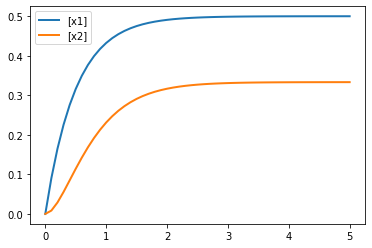

In [40]:
model = """
J0: $X0 -> x1; k1*X0
J1: x1 -> x2; k2*x1
J2: x2 -> $X1; k3*x2

X0 = 1
k1 = 1
k2 = 2
k3 = 3
X1 = 3
x1 = 0
x2 = 0
"""

rr = te.loada(model)
rr.plot(rr.simulate())

**Compare analysis with simulation.**
1. Evaluate non-complementary solutions.

# Save